# Collecting the data using Twitter API and Analyzing the data.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import tweepy
import json
from tweepy import OAuthHandler

In [2]:
# Keys from the Twitter API
consumer_key = "LzsCOl12ZZ79FObx7BV9a1R3a"
consumer_secret = "gODxZ1kHJHDGgYfyP12AUN37UTlDd6yn3OsSV9Tl0iwu0K0cRY"
access_token = "296102538-kYIK8SULCmRK4vgvYD2DhKbwvSXrgTdTkWh0Nvsp"
access_token_secret = "Ib9obwgcE5tZk4S6tY5rAqI5iXOeJc9FGFg28qHoa4YpP"

In [3]:
# Authentication
auth = tweepy.OAuthHandler( consumer_key , consumer_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

In [4]:
# Searching and getting the latest tweets about the query (Mumbai Indians will win IPL)
Tweets = api.search( "Mumbai Indians will win IPL" , count=10 , lang='en' , exclude='retweets' , tweet_mode='extended' )
for tweet in Tweets:
    print(tweet,"\n")
    print(".....................................\n")

Status(_api=<tweepy.api.API object at 0x00000275718BCC48>, _json={'created_at': 'Thu Oct 29 18:32:23 +0000 2020', 'id': 1321882590559657984, 'id_str': '1321882590559657984', 'full_text': "King's eleven panjab will break the ICE~IPL 2020 final journey will be neck and neck but first Named must be the championship in this tournament~IPL 2020 Points Table Updated: CSK’s Win Over KKR Helps Mumbai Indians Qualify for Playoffs... \nRead on JioNews https://t.co/bfkZDSisoF", 'truncated': False, 'display_text_range': [0, 280], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/bfkZDSisoF', 'expanded_url': 'https://share.jionews.com/s/1/apis?d=NyZpZD0xNDUyNDY5Nw==', 'display_url': 'share.jionews.com/s/1/apis?d=NyZ…', 'indices': [257, 280]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_status_id': None, 'in_reply_to_stat

In [5]:
# Get the tweets and some Attributes in a dataframe
df = pd.DataFrame(columns = ['Tweets' , 'User' , 'User_statuses_count' , 
                            'User_followers' , 'User_location' , 'User_verified' ,
                            'fav_count' , 'rt_count' , 'tweet_date'] )
print(df)

Empty DataFrame
Columns: [Tweets, User, User_statuses_count, User_followers, User_location, User_verified, fav_count, rt_count, tweet_date]
Index: []


In [6]:
# function to fetch data using tweepy.Cursor and store the data (Max=1000 records)
def stream(data, file_name):
    i = 0
    for tweet in tweepy.Cursor(api.search, q=data, count=100, exclude='retweets', lang='en').items():
        print('Tweets:',i, end='\r')
        df.loc[i, 'Tweets'] = tweet.text
        df.loc[i, 'User'] = tweet.user.name
        df.loc[i, 'User_statuses_count'] = tweet.user.statuses_count
        df.loc[i, 'User_followers'] = tweet.user.followers_count
        df.loc[i, 'User_location'] = tweet.user.location
        df.loc[i, 'User_verified'] = tweet.user.verified
        df.loc[i, 'fav_count'] = tweet.favorite_count
        df.loc[i, 'rt_count'] = tweet.retweet_count
        df.loc[i, 'tweet_date'] = tweet.created_at
        df.to_excel('{}.xlsx'.format(file_name))
        i = i+1
        if i == 1000:
            break
        else:
            pass

In [7]:
# Passing the search string and file name
stream(data=["Mumbai Indians will win IPL"] , file_name='MI_tweets')

In [8]:
df.head()

,Tweets,User,User_statuses_count,User_followers,User_location,User_verified,fav_count,rt_count,tweet_date
0,King's eleven panjab will break the ICE~IPL 20...,Ramesh S,5542,116,"Bengaluru South, India",False,1,0,2020-10-29 18:32:23
1,@aithal02 Pehle quality to karle......🤣🤣🤣🤣\nAn...,maulik makwana,569,18,"Nadiad, India",False,1,0,2020-10-29 08:44:19
2,An #MI loss on Sunday knocked #CSK out of the ...,ESPNcricinfo,151849,5914159,"At the cricket, mainly",True,1459,60,2020-10-29 08:30:00
3,@mipaltan @surya_14kumar congratulation surya ...,Mustak Arian,2,0,,False,0,0,2020-10-29 02:32:51
4,Master class batting from @surya_14kumar. He m...,Vinay Kumar R,1449,361107,Bangalore,True,1034,23,2020-10-28 17:39:36


In [9]:
# Function for cleaning the tweets using regular expression.
import re
def clean_tweet(tweet):
    tweet = re.sub('@\w+',' ', tweet)             # remove @mentions
    tweet = re.sub('\w+:\/\/\S+', ' ', tweet)      # remove links://...
    tweet = re.sub('[^0-9a-zA-Z \t]', ' ', tweet) # remove punctuation
    return tweet.strip()

In [10]:
# Function to analyze the sentiments 
from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [11]:
# Cleaning the tweets
df['clean_tweet'] = df['Tweets'].apply(lambda x : clean_tweet(x))
df[['Tweets', 'clean_tweet']].head()

,Tweets,clean_tweet
0,King's eleven panjab will break the ICE~IPL 20...,King s eleven panjab will break the ICE IPL 20...
1,@aithal02 Pehle quality to karle......🤣🤣🤣🤣\nAn...,Pehle quality to karle And oops if s...
2,An #MI loss on Sunday knocked #CSK out of the ...,An MI loss on Sunday knocked CSK out of the ...
3,@mipaltan @surya_14kumar congratulation surya ...,congratulation surya kumar yadav amp also m...
4,Master class batting from @surya_14kumar. He m...,Master class batting from He made the diffe...


In [12]:
# Analyze the sentiments of the tweets
df['Sentiment'] = df['clean_tweet'].apply(lambda x : analyze_sentiment(x) )
df.head()

,Tweets,User,User_statuses_count,User_followers,User_location,User_verified,fav_count,rt_count,tweet_date,clean_tweet,Sentiment
0,King's eleven panjab will break the ICE~IPL 20...,Ramesh S,5542,116,"Bengaluru South, India",False,1,0,2020-10-29 18:32:23,King s eleven panjab will break the ICE IPL 20...,Positive
1,@aithal02 Pehle quality to karle......🤣🤣🤣🤣\nAn...,maulik makwana,569,18,"Nadiad, India",False,1,0,2020-10-29 08:44:19,Pehle quality to karle And oops if s...,Positive
2,An #MI loss on Sunday knocked #CSK out of the ...,ESPNcricinfo,151849,5914159,"At the cricket, mainly",True,1459,60,2020-10-29 08:30:00,An MI loss on Sunday knocked CSK out of the ...,Positive
3,@mipaltan @surya_14kumar congratulation surya ...,Mustak Arian,2,0,,False,0,0,2020-10-29 02:32:51,congratulation surya kumar yadav amp also m...,Neutral
4,Master class batting from @surya_14kumar. He m...,Vinay Kumar R,1449,361107,Bangalore,True,1034,23,2020-10-28 17:39:36,Master class batting from He made the diffe...,Positive


In [13]:
# Count of Positive, Neutral, Negative Tweets
print('Positive tweets:', df[df.Sentiment == 'Positive'].shape[0])
print('Neutral tweets:',  df[df.Sentiment == 'Neutral'].shape[0])
print('Negative tweets:', df[df.Sentiment == 'Negative'].shape[0])

Positive tweets: 101
Neutral tweets: 9
Negative tweets: 0


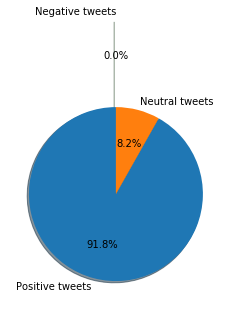

In [14]:
# Plotting the pie chart of the sentiments
import matplotlib.pyplot as plt
labels = 'Positive tweets', 'Neutral tweets', 'Negative tweets'
sizes = [df[df.Sentiment == 'Positive'].shape[0], df[df.Sentiment == 'Neutral'].shape[0], df[df.Sentiment == 'Negative'].shape[0]]
explode = (0, 0, 1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

In [15]:
# Analyze one specific record
n=0
print('\nOriginal tweet:\n', df['Tweets'][n])
print('\nCleaned tweet:\n',  df['clean_tweet'][n])
print('\nSentiment:\n',      df['Sentiment'][n])


Original tweet:
 King's eleven panjab will break the ICE~IPL 2020 final journey will be neck and neck but first Named must be the ch… https://t.co/95A7SUcol7

Cleaned tweet:
 King s eleven panjab will break the ICE IPL 2020 final journey will be neck and neck but first Named must be the ch

Sentiment:
 Positive


In [16]:
# Analyze one specific record
n=5
print('\nOriginal tweet:\n', df['Tweets'][n])
print('\nCleaned tweet:\n',  df['clean_tweet'][n])
print('\nSentiment:\n',      df['Sentiment'][n])


Original tweet:
 Both Ishan Kishan and Quinton de Kock are struggling with one of them perished. I agree with @MichaelVaughan that M… https://t.co/w33YX5g4EB

Cleaned tweet:
 Both Ishan Kishan and Quinton de Kock are struggling with one of them perished  I agree with   that M

Sentiment:
 Neutral


In [17]:
# Storing the cleaned and analyzed data in the excel file
df.to_excel('{}.xlsx'.format('MI_tweets'))